## Imports

In [6]:
import feedforward as ff
import numpy as np
import matplotlib.pyplot as plt


# The digit data from http://mnist-decoded.000webhostapp.com/
# which they have already decoded.
train_image_path="digit_data/mnist-train-images-tiff/"
train_label_path="digit_data/mnist-train-labels.txt"
test_image_path="digit_data/mnist-test-images-tiff/"
test_label_path="digit_data/mnist-test-labels.txt"

## Sizes

In [7]:
m = 100
nx = 28 * 28

## Labels

In [8]:
labels = np.fromfile(test_label_path, dtype=int, sep="\n")
#one-hot encoded the labels
y = np.eye(10)[labels].T[:,:m]
assert y.shape == (10, m), "y.shape={}, (nx={}, m={})".format(y.shape, nx, m)

## Images

shape = (28, 28)


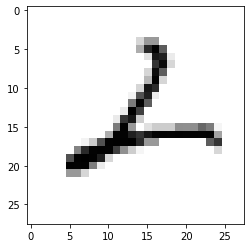

In [9]:
im = plt.imread(test_image_path + "00044.tif")
plt.imshow(im, cmap="gray")
print("shape = {}".format(im.shape))

In [10]:

X = np.zeros((nx, m))
for i in range(m):
    im = plt.imread(test_image_path + "{0:05d}.tif".format(i+1)) /255
    X[:,i] = np.reshape(im, nx)
    
assert X.shape == (nx, m)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


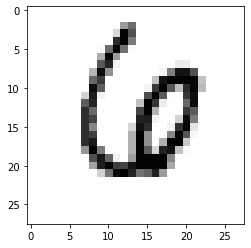

In [11]:
def show_image(im):
    plt.imshow(im.reshape((28,28)), cmap="gray")
    
# Check images and labels line up   
i = 66
show_image(X[:,i])
print(y[:,i])

In [12]:
W, b = ff.init([nx, 300, 10])
num_iterations = 10000
for it in range(num_iterations):
    W, b = ff.train(X, y, W, b, [ff.sigmoid, ff.sigmoid], [ff.dsigmoid, ff.dsigmoid], ff.sum_sqr_err, ff.dsqr_loss, 1, 1000)
    A, _ = ff.feedforward(X, W, b, [ff.sigmoid, ff.sigmoid])

    if it % 100 == 0:
        print(np.sum(ff.sum_sqr_err(A[-1], y))/ 10)
    

0.49924140153628666
0.44288283141145934
0.4424224254840219
0.43899969390771504
0.3704390548037881
0.31586210467413256
0.23938207507966708
0.1779514647997486
0.11609907737220333
0.08121327939718616
0.05088887454087347
0.02983483792641405
0.019814430547477304
0.01620530169309945
0.014502430283223363
0.013516224677349415
0.012873526425138232
0.012421271704390197
0.012085344988927568
0.011825416213423758
0.011617547911358451
0.011446532661516866
0.011302211095682994
0.01117770741548622
0.011068723190455808
0.010973019112566252
0.010889008634576184
0.010814434499568393
0.010746925889420153
0.010684751475305714
0.010626688795860161
0.01057176239650853
0.010519117082172888
0.010467947860099185
0.010417432300457975
0.01036664076420346
0.010314401050890702
0.010259077565111784
0.010198178312290527
0.010127577217823047
0.010039784108109176
0.00991958724626375
0.009731521357968207
0.009379575915488879
0.008596119113288054
0.007039966769340972
0.0050235760818118595
0.002921212534459508
0.001739142

array([2.42565327e-04, 1.12650963e-02, 9.78926247e-01, 8.87309176e-04,
       4.07063992e-06, 3.92734257e-04, 8.62943405e-04, 1.76720350e-02,
       1.96476019e-03, 4.31043601e-05])

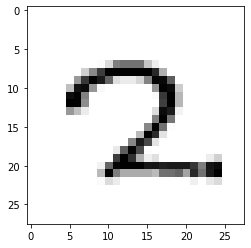

In [15]:
i = 77
show_image(X[:,i])
A, _ = ff.feedforward(X, W, b, [ff.sigmoid, ff.sigmoid])
A[-1][:,i]

In [16]:
np.argmax(A[-1][:,i])

2